In [1]:
from read import read_features

In [2]:
features_files = ['1_20151124_noon_2.csv', '2_20151106_noon.csv', '3_20151024_noon.csv','4_20151105_noon.csv', '4_20151107_noon.csv',
            '5_20141108_noon.csv', '5_20151012_night.csv', '6_20151121_noon.csv','7_20151015_night.csv', '8_20151022_noon.csv', 
            '9_20151017_night.csv', '10_20151125_noon.csv', '11_20151024_night.csv', '12_20150928_noon.csv', '13_20150929_noon.csv',
            '14_20151014_night.csv','15_20151126_night.csv', '16_20151128_night.csv', '17_20150925_noon.csv', '18_20150926_noon.csv',
            '19_20151114_noon.csv', '20_20151129_night.csv', '21_20151016_noon.csv']

In [3]:
file = './features/21_20151016_noon.csv'
X, y = read_features(file, features=[0, 1])
# X, y = read_features(file)

# K-Means

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_minmax = scaler.fit_transform(X)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

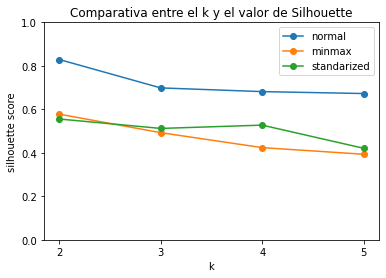

In [7]:
k_values = list(range(2, 5+1))
silhouette_scores = []
silhouette_scores_minmax = []
silhouette_scores_standar = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    
    kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    kmeans.fit_predict(X_minmax)
    silhouette_scores_minmax.append(silhouette_score(X_minmax, kmeans.labels_))
    
    kmeans.fit_predict(X_standar)
    silhouette_scores_standar.append(silhouette_score(X_standar, kmeans.labels_))
    
plt.plot(k_values, silhouette_scores, '-o', label='normal')
plt.plot(k_values, silhouette_scores_minmax, '-o', label='minmax')
plt.plot(k_values, silhouette_scores_standar, '-o', label='standarized')
plt.xticks(range(2,6))
plt.ylim([0, 1])
plt.title('Comparativa entre el k y el valor de Silhouette')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.legend()
plt.show()

In [8]:
def kmeans_simple_plot(X, y, n_plots=3):

    fig, ax = plt.subplots(ncols=n_plots ,figsize=(20,4))

    for k in range(2, 2+n_plots):
        ax[k-2].title.set_text(f"Clusters when k={k}")

        kmeans = KMeans(n_clusters=k)
        y_pred = kmeans.fit_predict(X)

        ax[k-2].scatter(X.T[0], X.T[1], c=y_pred)
        centroids = kmeans.cluster_centers_
        ax[k-2].scatter(centroids[:, 0], centroids[:, 1], s=100, c='red')

    plt.show()

In [9]:
def kmeans_complex_plot(X, y, n_plots=3):
    # Grafica compleja

    fig, ax = plt.subplots(nrows=n_plots, ncols=2 ,figsize=(20,15))
    fig. tight_layout(pad=5)

    for k in range(2, 2+n_plots):
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(X)

        ### Silhouette Diagram ###

        ax[k-2][0].set_xlim([-0.1, 1])
        ax[k-2][0].set_ylim([0, len(X) + (k + 1) * 10])

        silhouette_avg = silhouette_score(X, y_pred)

        sample_silhouette_values = silhouette_samples(X, y_pred)

        y_lower = 10
        for i in range(k):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[y_pred == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / k)
            ax[k-2][0].fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax[k-2][0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax[k-2][0].axvline(x=silhouette_avg, color="red", linestyle="--")

        ax[k-2][0].set_title(f"The silhouette diagram for n_clusters = {k}. Avg = {silhouette_avg:.3f}")
        ax[k-2][0].set_xlabel("The silhouette coefficient values")
        ax[k-2][0].set_ylabel("Cluster label")

        ax[k-2][0].set_yticks([])  # Clear the yaxis labels / ticks
        ax[k-2][0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        ### Clusters Visualization ###
        ax[k-2][1].set_title(f"Clusters visualization for n_clusters = {k}")
        ax[k-2][1].scatter(X.T[0], X.T[1], marker='.', s=50, lw=0, alpha=1,c=y_pred, edgecolor='k')
        centroids = kmeans.cluster_centers_
        ax[k-2][1].scatter(centroids[:, 0], centroids[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centroids):
                ax[k-2][1].scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters from %d to %d" % (2, n_plots+1)), fontweight='bold')
    plt.show()

In [19]:
def kmeans_predictions_plot(X, y, k=3):
    kmeans = KMeans(n_clusters=k)
    predictions = kmeans.fit_predict(X)

    plt.figure(figsize=(20, 8))
    plt.plot(y, color='gray')
    plt.scatter(range(len(predictions)), y, c=predictions)
    plt.title('Coloreado del valor PERCLOS y el cluster asociado')
    plt.xlabel('Epoch')
    plt.ylabel('% PERCLOS')
    plt.show()

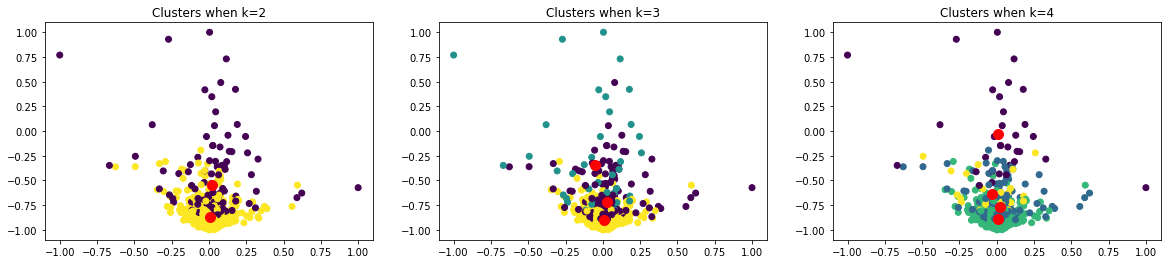

In [31]:
# kmeans_simple_plot(X, y, 3)
kmeans_simple_plot(X_minmax, y, 3)
# kmeans_simple_plot(X_standar, y, 3)

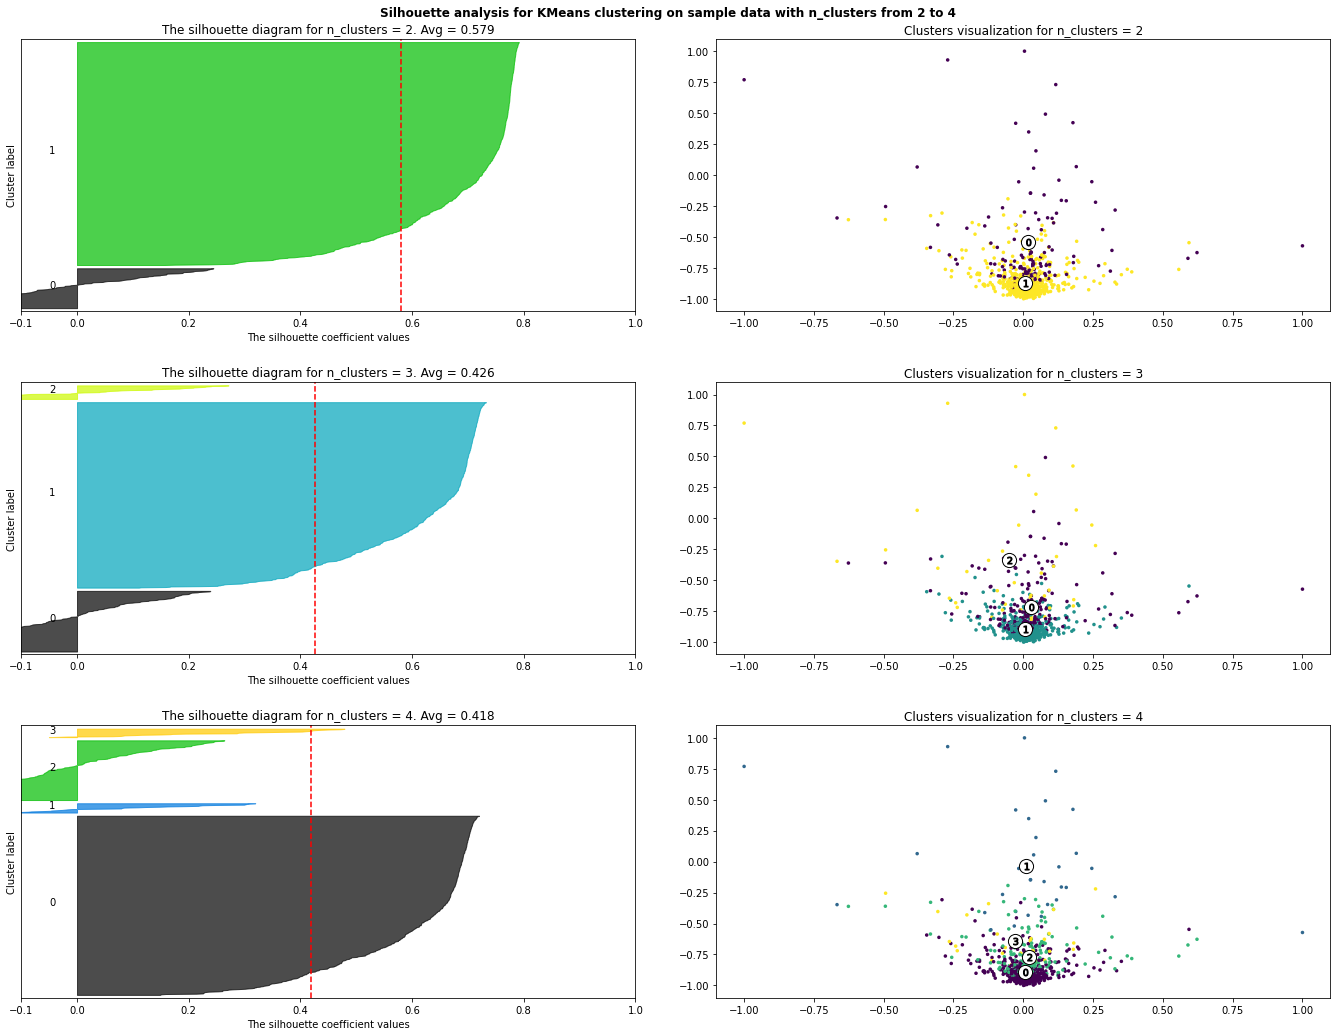

In [32]:
kmeans_complex_plot(X_minmax, y, 3)

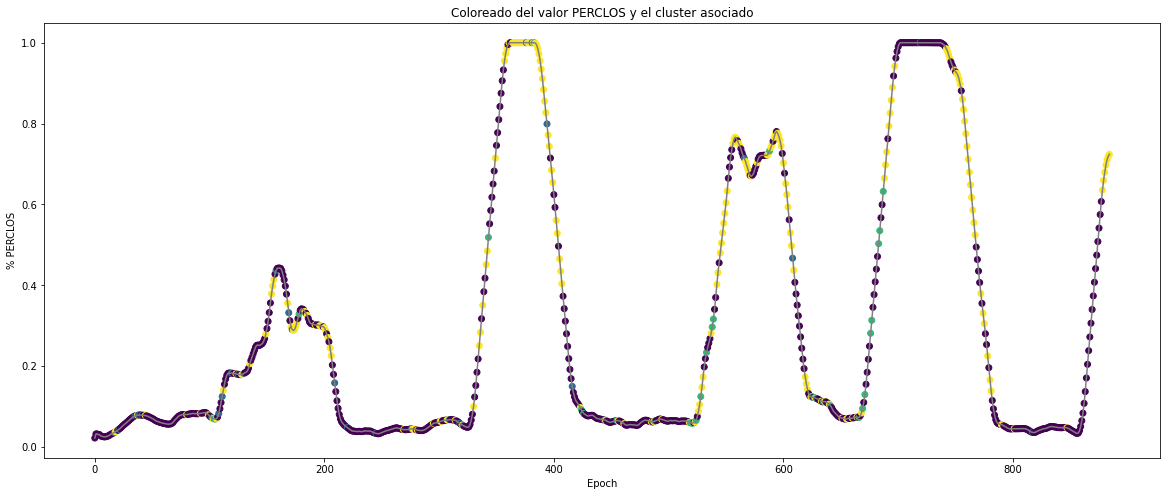

In [33]:
kmeans_predictions_plot(X_minmax, y, 4)